Problem Statement: From the given 'Iris' Dataset,predict the optimum number of clusters and represent it visually.


Name :Aishwarya Bhosale

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
#see the first 5 rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# Finding the optimum number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares


In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

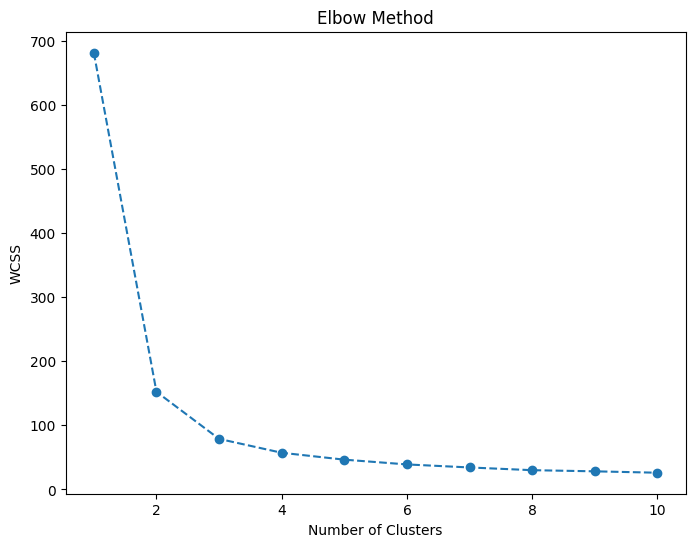

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [ ]:
## Applying KMeans with the optimal number of clusters
optimal_num_clusters = 3  # Replace this with the optimal number of clusters from the Elbow Method

kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=0)



You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.


In [ ]:
# Adding predicted clusters to the dataset
data['Cluster'] = kmeans.labels_


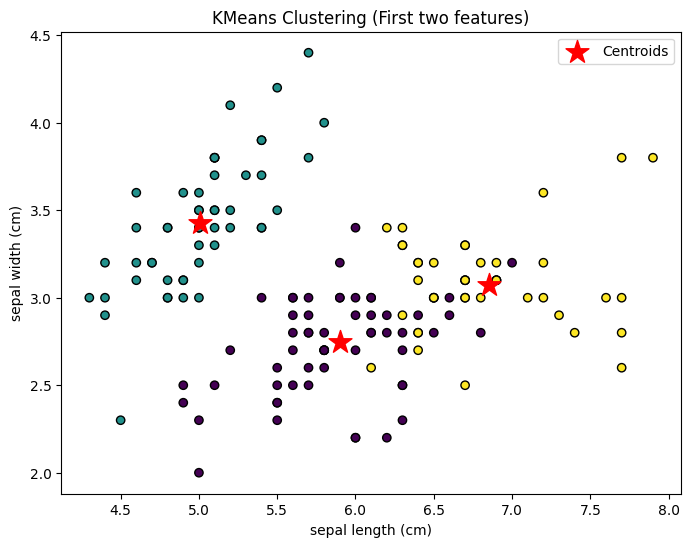

In [ ]:
# Visualizing the clusters (considering the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering (First two features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

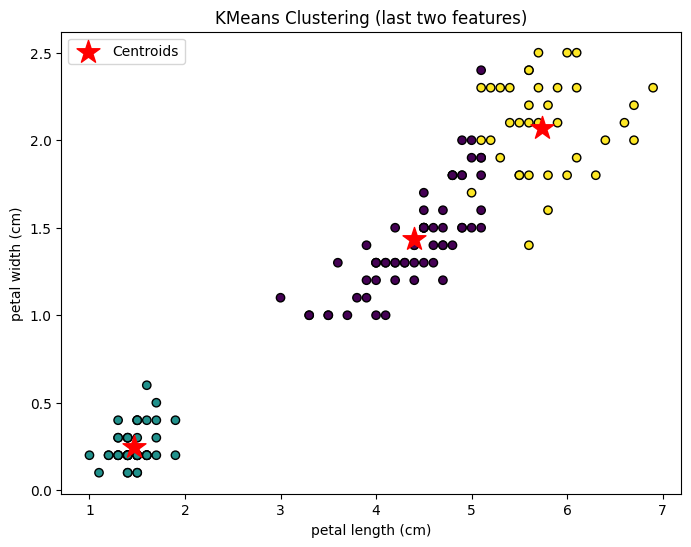

In [ ]:
# Visualizing the clusters (considering the last two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering (last two features)')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.show()